In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
import os

In [2]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [3]:
df = pd.read_csv("data/BigData/체질검사.csv")
df_x=df.drop('FAT',axis=1)
df_y=df['FAT']

# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


In [4]:
rf_uncustomize=GradientBoostingRegressor(random_state=1234)
rf_uncustomize.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomize.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomize.score(df_test_x, df_test_y)))

Score on training set : 0.981
Score on test set : 0.584


In [5]:
train_score=[]; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.589
6,70,0.963,0.590
7,80,0.970,0.584
8,90,0.976,0.585
9,100,0.981,0.584


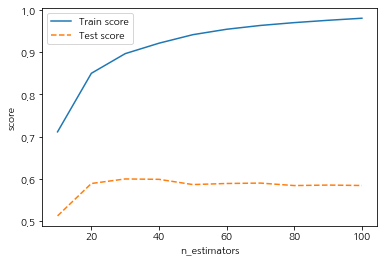

In [6]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [7]:
train_score=[]; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, 
                                  min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSampelsLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

df_score_leaf.round(3)

,MinSampelsLeaf,TrainScore,TestScore
0,1,0.897,0.600
1,2,0.899,0.596
2,3,0.896,0.595
3,4,0.893,0.586
4,5,0.890,0.604
5,6,0.888,0.596
6,7,0.884,0.590
7,8,0.874,0.610
8,9,0.879,0.598
9,10,0.873,0.587


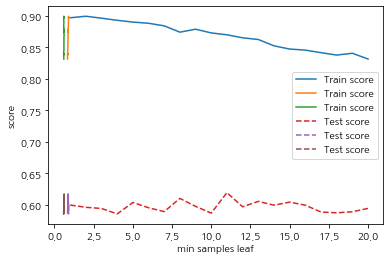

In [8]:
plt.plot(df_score_leaf, train_score, linestyle="-", label="Train score")
plt.plot(df_score_leaf, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [9]:
train_score=[]; test_score=[]

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, 
                                  min_samples_leaf=11, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSampelsSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

df_score_split.round(3)

,MinSampelsSplit,TrainScore,TestScore
0,2,0.870,0.620
1,4,0.870,0.620
2,6,0.870,0.620
3,8,0.870,0.620
4,10,0.870,0.620
5,12,0.870,0.620
6,14,0.870,0.620
7,16,0.870,0.620
8,18,0.870,0.620
9,20,0.870,0.620


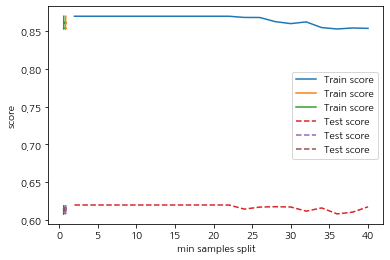

In [10]:
plt.plot(df_score_split, train_score, linestyle="-", label="Train score")
plt.plot(df_score_split, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [11]:
train_score=[]; test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, 
                                  min_samples_leaf=11, min_samples_split=22,
                                  max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.900,0.629
4,5,0.913,0.613
5,6,0.917,0.614
6,7,0.920,0.613
7,8,0.920,0.615
8,9,0.921,0.609
9,10,0.922,0.616


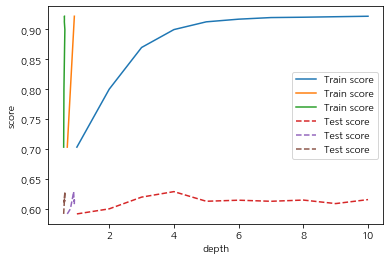

In [12]:
plt.plot(df_score_depth, train_score, linestyle="-", label="Train score")
plt.plot(df_score_depth, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

learning rate에 따른 모델 성능 확인하기!

In [13]:
train_score=[]; test_score=[]

para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, 
                                  min_samples_leaf=11, min_samples_split=22,
                                  max_depth=4, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['learning rate']=para_lr
df_score_lr['TrainScore']=train_score
df_score_lr['TestScore']=test_score

df_score_lr.round(3)

,learning rate,TrainScore,TestScore
0,0.1,0.900,0.629
1,0.2,0.940,0.588
2,0.3,0.966,0.566
3,0.4,0.981,0.539
4,0.5,0.984,0.533
5,0.6,0.990,0.527
6,0.7,0.993,0.478
7,0.8,0.994,0.437
8,0.9,0.997,0.464


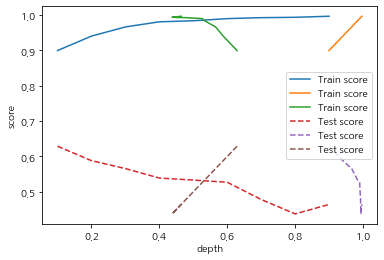

In [14]:
plt.plot(df_score_lr, train_score, linestyle="-", label="Train score")
plt.plot(df_score_lr, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

In [15]:
rf_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, 
                                     min_samples_split=22, max_depth=4, learning_rate=0.1)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set :0.900
Score on test set : 0.629


In [16]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, '변수')

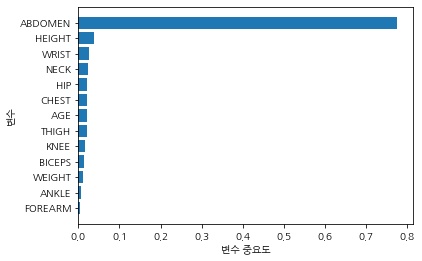

In [17]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [18]:
estimator = GradientBoostingRegressor(random_state=1234)

param_grid={"criterion":["mse","friedman_mse","mae"],"max_features":['auto','sqrt','log2']
    ,"max_depth":para_depth, "min_samples_leaf":para_leaf, "learning_rate":para_lr}

grid_dt=GridSearchCV(estimator, param_grid, scoring ="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model\n {}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

# 실습

In [22]:
df= pd.read_csv("data/BigData/DIABETES.csv")
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [23]:
df_x=df.drop('Y',axis=1)
df_y=df['Y']

# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(309, 10)
train data Y size :(309,)
test data X size :(133, 10)
test data Y size :(133,)


In [24]:
rf_uncustomize=GradientBoostingRegressor(random_state=1234)
rf_uncustomize.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomize.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomize.score(df_test_x, df_test_y)))

Score on training set : 0.865
Score on test set : 0.451


uncustomize 모델을 확인해본 결과 모델이 training 데이터에 과적합 된 것을 확인 할 수 있었다.

In [30]:
train_score=[]; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score
df_score_n['sub']=abs(df_score_n['TrainScore']-df_score_n['TestScore'])

df_score_n.round(3)

,n_estimators,TrainScore,TestScore,sub
0,10,0.504,0.430,0.074
1,20,0.639,0.495,0.144
2,30,0.707,0.501,0.206
3,40,0.751,0.491,0.260
4,50,0.778,0.485,0.293
5,60,0.802,0.476,0.325
6,70,0.825,0.470,0.355
7,80,0.841,0.468,0.373
8,90,0.852,0.464,0.389
9,100,0.865,0.455,0.410


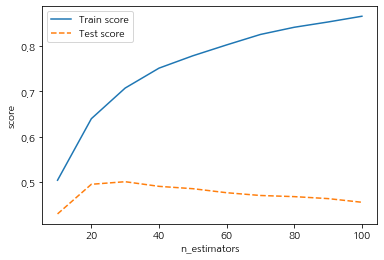

In [31]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

estimator = 30 결정

In [52]:
train_score=[]; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,50,3)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1, n_estimators=30, 
                                  min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSampelsLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score
df_score_leaf['sub']=abs(df_score_leaf['TrainScore']-df_score_leaf['TestScore'])

df_score_leaf.round(3)

,MinSampelsLeaf,TrainScore,TestScore,sub
0,1,0.707,0.501,0.206
1,4,0.700,0.492,0.208
2,7,0.682,0.496,0.186
3,10,0.684,0.502,0.181
4,13,0.674,0.495,0.179
5,16,0.654,0.493,0.160
6,19,0.654,0.494,0.160
7,22,0.636,0.497,0.140
8,25,0.629,0.492,0.137
9,28,0.623,0.475,0.148


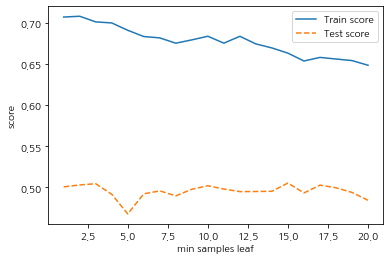

In [35]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

leaf =22

In [40]:
train_score=[]; test_score=[]

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1, n_estimators=30, 
                                  min_samples_leaf=10, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSampelsSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split['sub']=abs(df_score_split['TrainScore']-df_score_split['TestScore'])

df_score_split.round(3)

,MinSampelsSplit,TrainScore,TestScore,sub
0,2,0.684,0.502,0.181
1,4,0.684,0.502,0.181
2,6,0.684,0.502,0.181
3,8,0.684,0.502,0.181
4,10,0.684,0.502,0.181
5,12,0.684,0.502,0.181
6,14,0.684,0.502,0.181
7,16,0.684,0.502,0.181
8,18,0.684,0.502,0.181
9,20,0.684,0.502,0.181


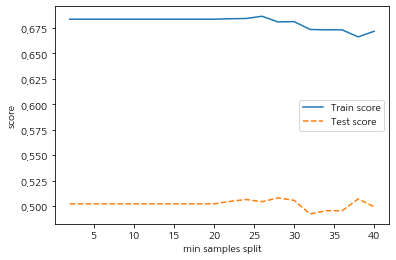

In [41]:
plt.plot(para_split, train_score, linestyle="-", label="Train score")
plt.plot(para_split, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

split = 26

In [42]:
train_score=[]; test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1, n_estimators=30, 
                                  min_samples_leaf=10, min_samples_split=26,
                                  max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score
df_score_depth['sub']=abs(df_score_depth['TrainScore']-df_score_depth['TestScore'])

df_score_depth.round(3)

,Depth,TrainScore,TestScore,sub
0,1,0.486,0.495,0.009
1,2,0.585,0.514,0.071
2,3,0.687,0.504,0.182
3,4,0.750,0.471,0.279
4,5,0.807,0.450,0.356
5,6,0.834,0.437,0.397
6,7,0.854,0.448,0.406
7,8,0.860,0.441,0.418
8,9,0.863,0.439,0.424
9,10,0.865,0.440,0.425


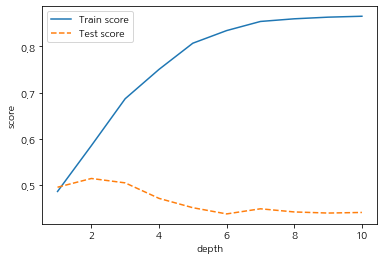

In [43]:
plt.plot(para_depth, train_score, linestyle="-", label="Train score")
plt.plot(para_depth, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

depth=3

In [74]:
train_score=[]; test_score=[]

para_lr = [lr*0.01 for lr in range(1,50,2)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1, n_estimators=30, 
                                  min_samples_leaf=11, min_samples_split=22,
                                  max_depth=4, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['learning rate']=para_lr
df_score_lr['TrainScore']=train_score
df_score_lr['TestScore']=test_score
df_score_lr['sub']=abs(df_score_lr['TestScore']-df_score_lr['TrainScore'])

df_score_lr.round(3)

,learning rate,TrainScore,TestScore,sub
0,0.01,0.255,0.213,0.042
1,0.03,0.520,0.399,0.121
2,0.05,0.635,0.452,0.183
3,0.07,0.701,0.471,0.230
4,0.09,0.736,0.474,0.262
5,0.11,0.760,0.465,0.295
6,0.13,0.779,0.441,0.339
7,0.15,0.798,0.455,0.344
8,0.17,0.816,0.430,0.386
9,0.19,0.834,0.445,0.389


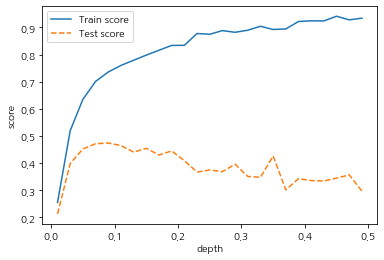

In [75]:
plt.plot(para_lr, train_score, linestyle="-", label="Train score")
plt.plot(para_lr, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

In [50]:
rf_final = GradientBoostingRegressor(random_state=1, n_estimators=30, min_samples_leaf=11, 
                                     min_samples_split=22, max_depth=4, learning_rate=0.1)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set :0.757
Score on test set : 0.475


In [57]:
rf_final = GradientBoostingRegressor(random_state=1, n_estimators=30, min_samples_leaf=10, 
                                     min_samples_split=28, max_depth=3, learning_rate=0.1)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set :0.681
Score on test set : 0.508


In [68]:
rf_final = GradientBoostingRegressor(random_state=1, n_estimators=30, min_samples_leaf=10, 
                                     min_samples_split=28, max_depth=3, learning_rate=0.2)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set :0.757
Score on test set : 0.445
